Test RMSE: 1.8798543768009648


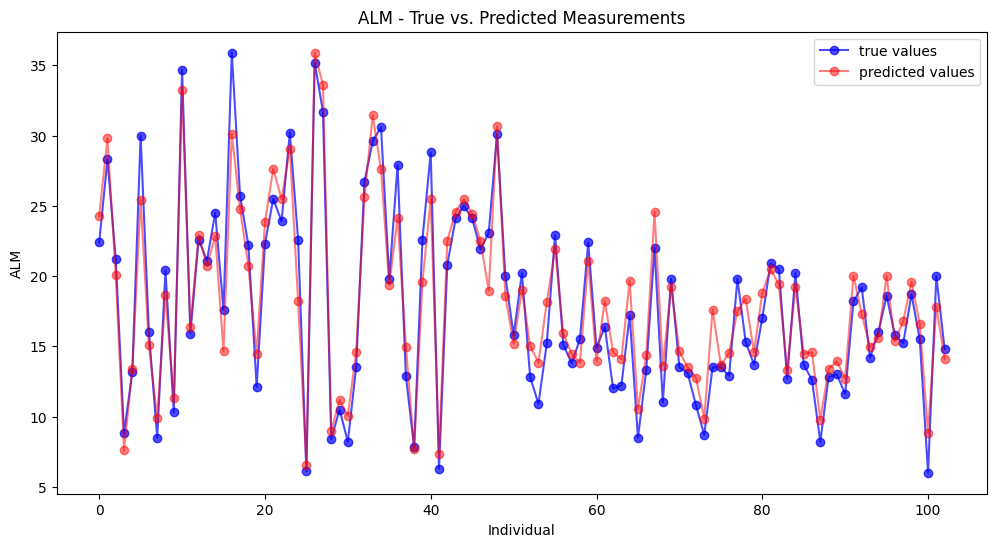

In [26]:
import numpy as np
import pandas as pd
import xgboost as xgb
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training and test datasets the following two lines need to be changed replace the paths with the paths of the files you have stored on your computer 
train_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_training.csv')
test_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_test.csv')

# Specify columns to exclude
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total","Race"]

# Define features and target for training
X_train = train_df.drop(columns=excluded_columns)
y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

# Define features for testing (we'll compare the predictions with actual ALM values later)
X_test = test_df.drop(columns=excluded_columns)
y_test = test_df['ALM']

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(n_estimators = 10, seed = 123)
model.fit(X_train, y_train)

# Make predictions on the training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate and print the RMSE for both sets
train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

# print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


#plotting the model
individual_index = 0
test_amt = len(test_predictions)
x = np.zeros(test_amt)
y = np.zeros(test_amt)
z = np.zeros(test_amt)

for individual_index in range(0, test_amt):
    individual_prediction = test_predictions[individual_index]
    actual_measurement = y_test[individual_index]
    x[individual_index] = individual_index
    #print(x)
    y[individual_index] = individual_prediction
    #print(y)
    z[individual_index] = actual_measurement
    #x[individual_index] = individual_index + 1
    individual_index = individual_index + 1
    #print(individual_index)

plt.figure(figsize=(12,6))  
plt.plot(x, z, 'bo-', label = 'true values',alpha = 0.7) #c = 'blue'
plt.plot(x, y, 'ro-', label = 'predicted values', alpha = 0.5) #c = 'red'
plt.title('ALM - True vs. Predicted Measurements')
plt.legend(loc = 'upper right')
plt.xlabel('Individual')
plt.ylabel('ALM')
plt.show()

14
15
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


C:\Users\seths\AppData\Local\Temp\ipykernel_2784\2583052417.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


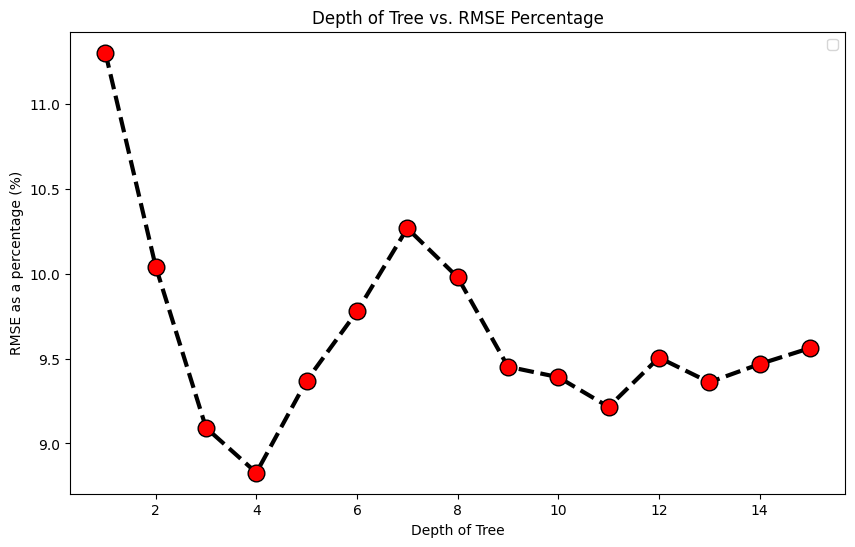

In [27]:
#initialzes all the variables we will do error analysis with
N = 15
trees = []

for n in range(1,N):
    trees.append(n)
print(len(trees))

nodes = np.zeros((N))
print(len(nodes))

for i in range(len(nodes)):
    nodes[i] = i + 1 
print(nodes)

error = np.zeros((N))


#error analysis for fixed trees, varying depth
for node in nodes: 
    model = xgb.XGBRegressor(n_estimators=50, max_depth = int(node), random_state=42)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
    rmse_predictions = (test_rmse/y_test.mean()) * 100
    #print(tree)
    error[int(node) - 1] = rmse_predictions
    #error[int(node)] = rmse_predictions


plt.figure(figsize=(10,6))  
plt.plot(nodes, error, marker='o', linestyle='dashed', color='black', linewidth = 3, markerfacecolor='red', markersize=12)
plt.title('Depth of Tree vs. RMSE Percentage')
plt.legend(loc = 'upper right')
plt.xlabel('Depth of Tree')
plt.ylabel('RMSE as a percentage (%)')
plt.grid(False)
plt.show()

24
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


C:\Users\seths\AppData\Local\Temp\ipykernel_2784\2195755150.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


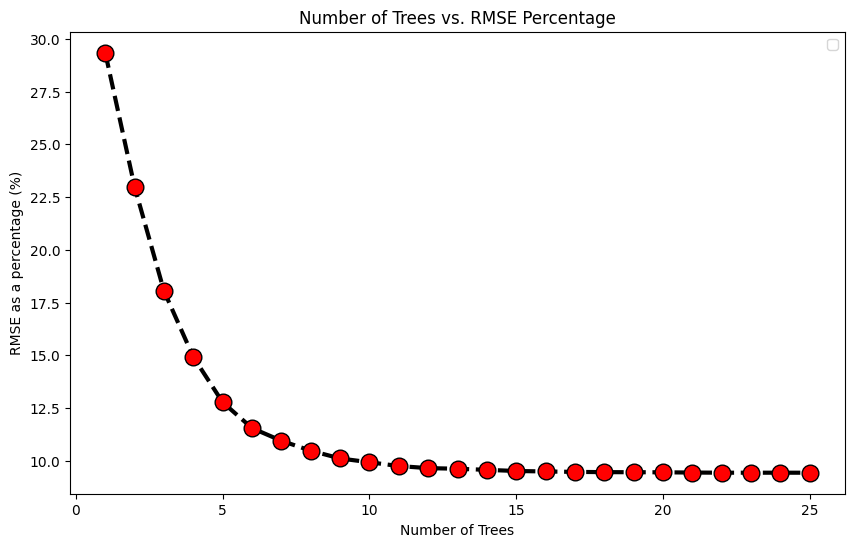

In [28]:
#reinitializes variables for testing 
N = 25

trees = []
for n in range(1,N):
    trees.append(n)#*N_STEP
print(len(trees))


trees = np.zeros((N))
for i in range(len(trees)):
    trees[i] = i +1 
print(trees)

error = np.zeros((N))
#print(error)
#print(np.shape(trees))
#print(np.shape(error))


#error analysis for fixed node depth, varying trees
for tree in trees: 
    model = xgb.XGBRegressor(n_estimators = int(tree), max_depth = 50, random_state=42)
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
    rmse_predictions = (test_rmse/y_test.mean()) * 100
    #print(tree)
    error[int(tree) - 1] = rmse_predictions
    #print(error)

plt.figure(figsize=(10,6))  
plt.plot(trees, error, marker='o', linestyle='dashed', color='black', linewidth = 3, markerfacecolor='red', markersize=12)
plt.title('Number of Trees vs. RMSE Percentage')
plt.legend(loc = 'upper right')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE as a percentage (%)')
plt.grid(False)
plt.show()

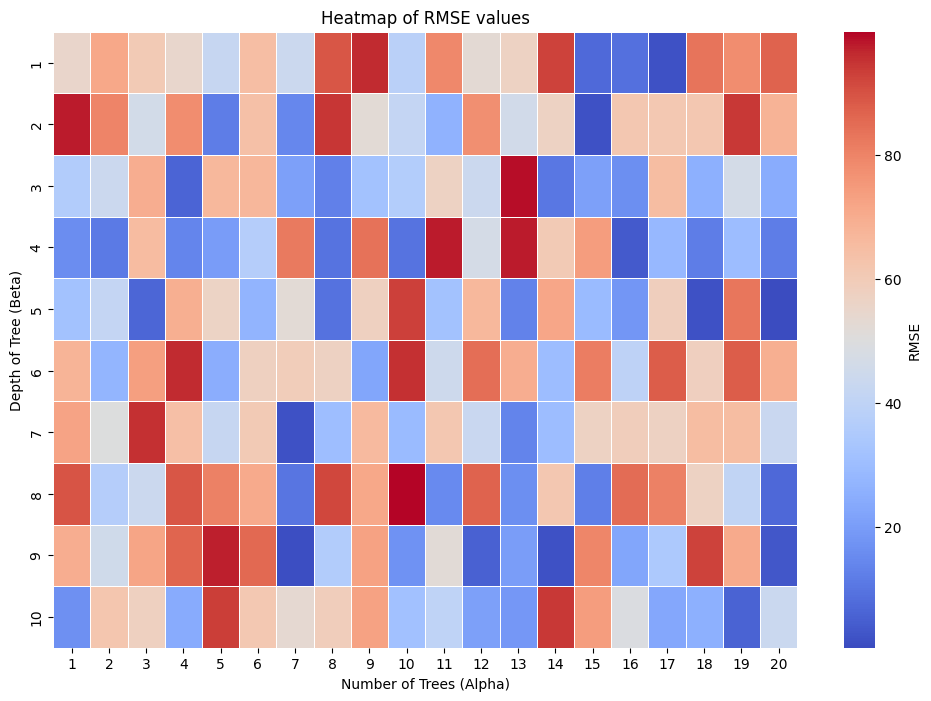

In [29]:
import seaborn as sns
 
# Simulate RMSE values
np.random.seed(0)
alphas = np.arange(1, 21)
betas = np.arange(1, 11)
rmse_values = np.random.rand(len(betas), len(alphas)) * 100  # Simulated RMSE values
 
# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame(rmse_values, index=betas, columns=alphas)
 
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rmse_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RMSE'})
plt.title('Heatmap of RMSE values')
plt.xlabel('Number of Trees (Alpha)')
plt.ylabel('Depth of Tree (Beta)')
plt.show()

In [2]:
#K fold cross validation for varying trees & node depth
 
from sklearn.model_selection import KFold
# Number of splits
num_runs = 1
num_splits = 5
data = pd.read_csv('./../Data/complete_data.csv')
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
 
Percentage_Rmses = np.zeros((num_runs, num_splits))
for run in range(num_runs):
    print(f"Run {run+1}/{num_runs}")
    # Define k-fold cross-validation for this run
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=run)
    for fold, (train_index, test_index) in enumerate(kf.split(data)):
        print(f"  Fold {fold+1}/{num_splits}")
 
        train_df = data.iloc[train_index]
        test_df = data.iloc[test_index]
        # Define features and target for training
        X_train = train_df.drop(columns=excluded_columns)
        y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total
 
        # Define features for testing (we'll compare the predictions with actual ALM values later)
        X_test = test_df.drop(columns=excluded_columns)
        y_test = test_df['ALM']
 
         ##### model for varying num of trees #########
        N = 25;
        trees = []
 
        for n in range(1,N):
            trees.append(n)
        print(len(trees))
 
        #make 
        trees = np.zeros((N))
        for i in range(len(trees)):
            trees[i] = i + 1 
        print(trees)
 
        error = np.zeros((N))
 
        #for fixed number of nodes: 
        for tree in trees: 
            model = xgb.XGBRegressor(n_estimators = int(tree), max_depth = 10, random_state=42)
            model.fit(X_train, y_train)
            train_predictions = model.predict(X_train)
            test_predictions = model.predict(X_test)
            test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
            rmse_predictions = (test_rmse/y_test.mean()) * 100
            #print(tree)
            error[int(tree) - 1] = rmse_predictions
            average_alm_test = np.sqrt(np.mean(np.square(y_test)))
            percent_rmse = (test_rmse / average_alm_test) * 100

        Percentage_Rmses[run, fold] = percent_rmse

print(Percentage_Rmses)
final_error=np.mean(Percentage_Rmses)
print(final_error)
 
#random forests:
#combined % rmse: 9.431343846497725
#female % rmse: 10.941281322223665
#male % rmse: 8.2987370473286

Run 1/1
  Fold 1/5
24
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


NameError: name 'xgb' is not defined

In [31]:
import seaborn as sns

train_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_training.csv')
test_df = pd.read_csv('./../Data/Old_Data_Safe_Here/Dataset_1/Combined_Data_1/combined_test.csv')

# Specify columns to exclude
excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total","Race"]

# Define features and target for training
X_train = train_df.drop(columns=excluded_columns)
y_train = train_df['ALM'] #ALM, BMD - Total, % fat - Total

# Define features for testing (we'll compare the predictions with actual ALM values later)
X_test = test_df.drop(columns=excluded_columns)
y_test = test_df['ALM']


N = 30;
trees = []

for n in range(1,N):
    trees.append(n)
print(trees)

M = 30; 
nodes = []

for m in range(1,M):
    nodes.append(m)
print(nodes)

##### model for varying num of trees #########

error = np.zeros((N))
Percentage_Rmses = np.zeros((len(trees),len(nodes)))

#for fixed number of nodes: 
for i in range(len(trees)): 
    for j in range(len(nodes)): 
        model = xgb.XGBRegressor(n_estimators = int(trees[i]), max_depth = int(nodes[j]), random_state=42)
        model.fit(X_train, y_train)
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)
        test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
        rmse_predictions = (test_rmse/y_test.mean()) * 100
        #print(tree)
        #error[int(tree) - 1] = rmse_predictions
        average_alm_test = np.mean(y_test)
        percent_rmse = (test_rmse / average_alm_test) * 100
        Percentage_Rmses[i, j] = percent_rmse
            

        # Make predictions on the training and test sets
        #train_predictions = model.predict(X_train)
        #test_predictions = model.predict(X_test)

        # Calculate and print the RMSE for both sets
        #train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
        #test_rmse = sqrt(mean_squared_error(y_test, test_predictions))

        #average_alm_test = np.mean(y_test)
        #percent_rmse = (test_rmse / average_alm_test) * 100
    #Percentage_Rmses[N,M] = percent_rmse

#print(Percentage_Rmses)
'''
print(trees)
print(Percentage_Rmses)
print(len(Percentage_Rmses))
'''


# Simulate RMSE values
rmse_values = Percentage_Rmses
alphas = trees
betas = nodes
 
# Create a DataFrame for RMSE values
rmse_df = pd.DataFrame(rmse_values, index=betas, columns=alphas)
 
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(rmse_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5, cbar_kws={'label': 'RMSE'})
plt.title('Heatmap of RMSE values')
plt.xlabel('Number of Trees')
plt.ylabel('Depth of Tree')
plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


KeyboardInterrupt: 

In [3]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


train_df = pd.read_csv('./../Data/complete_data.csv')

excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_features = ["ALM", "% fat - Total", "BMD - Total"]
sexes = ['Male', 'Female', 'Combined']


# Live progress bar for your patience so you know how far you have and don't cancel it right before it is done (lol)
def update_progress_bar(completed, total, bar_length = 50):

    progress = int(bar_length * completed / total)
    bar = '#' * progress + '_' * (bar_length - progress)

    print(f'[{bar}] {completed}/{total} iterations completed', end='\r')



#-----PARAMETERS TO MODIFY-----

# NOTE: Increasing any of the following values will greatly increase the amount of time it takes to run the model

# Number of trees are the y-axis for every plot. Put these values in descending order here if you want them to ascend the y-axis on the plots
trees = [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# Depth of trees are the x-axis for every plot. Put these values in ascending order here if you want them to ascend from left-to-right on the plots
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Number of runs for K-Fold cross validation
num_runs = 10

# 'K' number of splits for K-Fold cross validation
num_splits = 5

#-----PARAMETERS TO MODIFY-----



# Total iterations calculation
total_iterations = len(sexes) * len(trees) * len(depths) * len(target_features) * num_runs * num_splits
completed_iterations = 0


# This tensor is where all of the RMSE values are stored
results_tensor = np.zeros((len(sexes), len(target_features), len(trees), len(depths)))


# Runs the model and performs the calculations for RMSE values
for sex_idx, sex in enumerate(sexes):

    if sex == 'Combined':
        filtered_df = train_df
    else:
        filtered_df = train_df[train_df['Gender'] == sex]
        
    for target_idx, target_feature in enumerate(target_features):
        for tree_idx, tree in enumerate(trees):
            for depth_idx, depth in enumerate(depths):

                rmses = []
                
                for run in range(num_runs):

                    kf = KFold(n_splits = num_splits, shuffle = True, random_state = run)
                    
                    X = filtered_df.drop(columns = excluded_columns)
                    y = filtered_df[target_feature]

                    # making the pipeline without the scaler
                    model = make_pipeline(XGBRegressor(n_estimators = tree, max_depth = depth))

                    for train_index, test_index in kf.split(X):

                        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                        
                        model.fit(X_train, y_train)
                        predictions = model.predict(X_test)

                        rmse = 100 * sqrt(mean_squared_error(y_test, predictions)) / np.sqrt(np.mean(np.square(y_test)))
                        rmses.append(rmse)

                        completed_iterations += 1
                        update_progress_bar(completed_iterations, total_iterations)
                

                avg_rmse = np.mean(rmses)
                results_tensor[sex_idx, target_idx, tree_idx, depth_idx] = avg_rmse


print('\nAll iterations completed. Plotting the results...')


# Plotting
fig, axs = plt.subplots(nrows = len(target_features), ncols = len(sexes), figsize = (20, 15), sharex = True, sharey = True)
fig.suptitle('XGBoost', fontsize = 16)
fig.set_facecolor("white")

for target_idx, target_feature in enumerate(target_features):
    for sex_idx, sex in enumerate(sexes):

        heatmap_data = results_tensor[sex_idx, target_idx]
        ax = axs[target_idx, sex_idx]

        min = np.min(results_tensor[sex_idx, target_idx, :, :])
        max = np.max(results_tensor[sex_idx, target_idx, :, :])


        sns.heatmap(heatmap_data, xticklabels = depths, yticklabels = trees, cmap = 'viridis', vmin = min, vmax = max, ax = ax)


        # A bunch of hardcoded if-statements to set all of the titles
        if target_idx == 0:
            ax.set_title(f'{sex}', fontsize = 12)
        
        if sex_idx == 0:
            if target_idx == 0:
                ax.set_ylabel(f'ALM\nn', fontsize = 12)
            
            if target_idx == 1:
                ax.set_ylabel(f'BFP\nn', fontsize = 12)

            if target_idx == 2:
                ax.set_ylabel(f'BMD\nn', fontsize = 12)
        
        if target_idx == len(target_features) - 1:
            ax.set_xlabel('d', fontsize = 12)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Find and print the best parameters
for target_feature_idx, target_feature in enumerate(target_features):
    for sex_idx, sex in enumerate(sexes):

        best_idx = np.unravel_index(np.argmin(results_tensor[sex_idx, target_feature_idx]),
                                    results_tensor[sex_idx, target_feature_idx].shape)
        
        best_tree = trees[best_idx[0]]
        best_depth = depths[best_idx[1]]
        best_rmse = results_tensor[sex_idx, target_feature_idx, best_idx[0], best_idx[1]]


        # More hardcoded if-statements and prints
        if target_feature_idx == 0:
            print(f"Best parameters for ALM ({sex}):")
        
        if target_feature_idx == 1:
            print(f"Best parameters for BFP ({sex}):")

        if target_feature_idx == 2:
            print(f"Best parameters for BMD ({sex}):")


        print(f"  Trees: {best_tree}")
        print(f"  Depth: {best_depth}")
        print(f"  RMSE: {best_rmse:.2f}%")

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f8a83392a70>>
Traceback (most recent call last):
  File "/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py", line 637, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
  File "/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/xgboost/data.py", line 1416, in next
    input_data(**self.kwargs)
  File "/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  

XGBoostError: [17:24:40] /Users/runner/work/xgboost/xgboost/src/data/proxy_dmatrix.h:172: Unknown type: v
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000155dc7c35 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000155fc78c8 xgboost::data::IterativeDMatrix::InitFromCPU(xgboost::Context const*, xgboost::BatchParam const&, void*, float, std::__1::shared_ptr<xgboost::DMatrix>)::$_1::operator()() const + 1176
  [bt] (2) 3   libxgboost.dylib                    0x0000000155fc1838 xgboost::data::IterativeDMatrix::InitFromCPU(xgboost::Context const*, xgboost::BatchParam const&, void*, float, std::__1::shared_ptr<xgboost::DMatrix>) + 488
  [bt] (3) 4   libxgboost.dylib                    0x0000000155fc1165 xgboost::data::IterativeDMatrix::IterativeDMatrix(void*, void*, std::__1::shared_ptr<xgboost::DMatrix>, void (*)(void*), int (*)(void*), float, int, int) + 1269
  [bt] (4) 5   libxgboost.dylib                    0x0000000155f71764 xgboost::DMatrix* xgboost::DMatrix::Create<void*, void*, void (void*), int (void*)>(void*, void*, std::__1::shared_ptr<xgboost::DMatrix>, void (*)(void*), int (*)(void*), float, int, int) + 116
  [bt] (5) 6   libxgboost.dylib                    0x0000000155dd0ebb XGQuantileDMatrixCreateFromCallback + 539
  [bt] (6) 7   libffi.7.dylib                      0x000000010dd9fead ffi_call_unix64 + 85



This is for random forest

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


train_df = pd.read_csv('./../Data/complete_data.csv')

excluded_columns = ["0", "PPT ID", "Site", "Gender", "BMD - Total", "ALM", "% fat - Total", "Race"]
target_features = ["ALM", "% fat - Total", "BMD - Total"]
sexes = ['Male', 'Female', 'Combined']


# Live progress bar for your patience so you know how far you have and don't cancel it right before it is done (lol)
def update_progress_bar(completed, total, bar_length = 50):

    progress = int(bar_length * completed / total)
    bar = '#' * progress + '_' * (bar_length - progress)

    print(f'[{bar}] {completed}/{total} iterations completed', end='\r')



#-----PARAMETERS TO MODIFY-----

# NOTE: Increasing any of the following values will greatly increase the amount of time it takes to run the model

# Number of trees are the y-axis for every plot. Put these values in descending order here if you want them to ascend the y-axis on the plots
trees = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5,2]

# Depth of trees are the x-axis for every plot. Put these values in ascending order here if you want them to ascend from left-to-right on the plots

depths=[2,5,10,15,20,25,30,35,40,45,50]

# Number of runs for K-Fold cross validation
num_runs = 10

# 'K' number of splits for K-Fold cross validation
num_splits = 5

#-----PARAMETERS TO MODIFY-----



# Total iterations calculation
total_iterations = len(sexes) * len(trees) * len(depths) * len(target_features) * num_runs * num_splits
completed_iterations = 0


# This tensor is where all of the RMSE values are stored
results_tensor = np.zeros((len(sexes), len(target_features), len(trees), len(depths)))


# Runs the model and performs the calculations for RMSE values
for sex_idx, sex in enumerate(sexes):

    if sex == 'Combined':
        filtered_df = train_df
    else:
        filtered_df = train_df[train_df['Gender'] == sex]
        
    for target_idx, target_feature in enumerate(target_features):
        for tree_idx, tree in enumerate(trees):
            for depth_idx, depth in enumerate(depths):

                rmses = []
                
                for run in range(num_runs):

                    kf = KFold(n_splits = num_splits, shuffle = True, random_state = run)
                    
                    X = filtered_df.drop(columns = excluded_columns)
                    y = filtered_df[target_feature]

                    # making the pipeline without the scaler
                    # model = make_pipeline(XGBRegressor(n_estimators = tree, max_depth = depth))
                    model = RandomForestRegressor(n_estimators =tree, max_depth = depth, random_state=42)

                    for train_index, test_index in kf.split(X):

                        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
                        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                        
                        model.fit(X_train, y_train)
                        predictions = model.predict(X_test)

                        rmse = 100 * sqrt(mean_squared_error(y_test, predictions)) / np.sqrt(np.mean(np.square(y_test)))
                        rmses.append(rmse)

                        completed_iterations += 1
                        update_progress_bar(completed_iterations, total_iterations)
                

                avg_rmse = np.mean(rmses)
                results_tensor[sex_idx, target_idx, tree_idx, depth_idx] = avg_rmse


print('\nAll iterations completed. Plotting the results...')


# Plotting
fig, axs = plt.subplots(nrows = len(target_features), ncols = len(sexes), figsize = (20, 15), sharex = True, sharey = True)
fig.suptitle('Random Forest', fontsize = 16)
fig.set_facecolor("white")

for target_idx, target_feature in enumerate(target_features):
    for sex_idx, sex in enumerate(sexes):

        heatmap_data = results_tensor[sex_idx, target_idx]
        ax = axs[target_idx, sex_idx]

        min = np.min(results_tensor[sex_idx, target_idx, :, :])
        max = np.max(results_tensor[sex_idx, target_idx, :, :])


        sns.heatmap(heatmap_data, xticklabels = depths, yticklabels = trees, cmap = 'viridis', vmin = min, vmax = max, ax = ax)


        # A bunch of hardcoded if-statements to set all of the titles
        if target_idx == 0:
            ax.set_title(f'{sex}', fontsize = 12)
        
        if sex_idx == 0:
            if target_idx == 0:
                ax.set_ylabel(f'ALM\nn', fontsize = 12)
            
            if target_idx == 1:
                ax.set_ylabel(f'BFP\nn', fontsize = 12)

            if target_idx == 2:
                ax.set_ylabel(f'BMD\nn', fontsize = 12)
        
        if target_idx == len(target_features) - 1:
            ax.set_xlabel('d', fontsize = 12)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Find and print the best parameters
for target_feature_idx, target_feature in enumerate(target_features):
    for sex_idx, sex in enumerate(sexes):

        best_idx = np.unravel_index(np.argmin(results_tensor[sex_idx, target_feature_idx]),
                                    results_tensor[sex_idx, target_feature_idx].shape)
        
        best_tree = trees[best_idx[0]]
        best_depth = depths[best_idx[1]]
        best_rmse = results_tensor[sex_idx, target_feature_idx, best_idx[0], best_idx[1]]


        # More hardcoded if-statements and prints
        if target_feature_idx == 0:
            print(f"Best parameters for ALM ({sex}):")
        
        if target_feature_idx == 1:
            print(f"Best parameters for BFP ({sex}):")

        if target_feature_idx == 2:
            print(f"Best parameters for BMD ({sex}):")


        print(f"  Trees: {best_tree}")
        print(f"  Depth: {best_depth}")
        print(f"  RMSE: {best_rmse:.2f}%")

/Users/gyaneshwaragrahari/opt/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


KeyboardInterrupt: 